# Importando Bibliotecas utilizadas

In [20]:
pip install python-bcb
pip install numpy
pip install matplotlib
pip install yfinance
pip install mplfinance

SyntaxError: invalid syntax (636794993.py, line 1)

In [21]:
import bcb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import mplfinance as mpf

## Visualizando dados IBOV

Trazendo valores do indice IBOVESPA do primeiro dia de cada mês da base do Yahoo Finanças. 

In [22]:
Ibov11_20 = yf.Ticker('^BVSP').history(start='2011-01-01',end='2020-12-02', interval='1mo')
Ibov11_20

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-01 00:00:00-02:00,69310.0,71924.0,65898.0,66575.0,41876200,0.0,0.0
2011-02-01 00:00:00-02:00,66575.0,68226.0,64016.0,67383.0,48663800,0.0,0.0
2011-03-01 00:00:00-03:00,67381.0,68606.0,65463.0,68587.0,45965400,0.0,0.0
2011-04-01 00:00:00-03:00,68588.0,70108.0,65105.0,66133.0,34800400,0.0,0.0
2011-05-01 00:00:00-03:00,66119.0,66500.0,61659.0,64620.0,48359800,0.0,0.0
...,...,...,...,...,...,...,...
2020-08-01 00:00:00-03:00,102913.0,104523.0,98513.0,99369.0,202682200,0.0,0.0
2020-09-01 00:00:00-03:00,99382.0,103226.0,93408.0,94603.0,182459100,0.0,0.0
2020-10-01 00:00:00-03:00,94604.0,102218.0,93387.0,93952.0,198128300,0.0,0.0


Plotando gráfico com cotações, volume e médias móveis

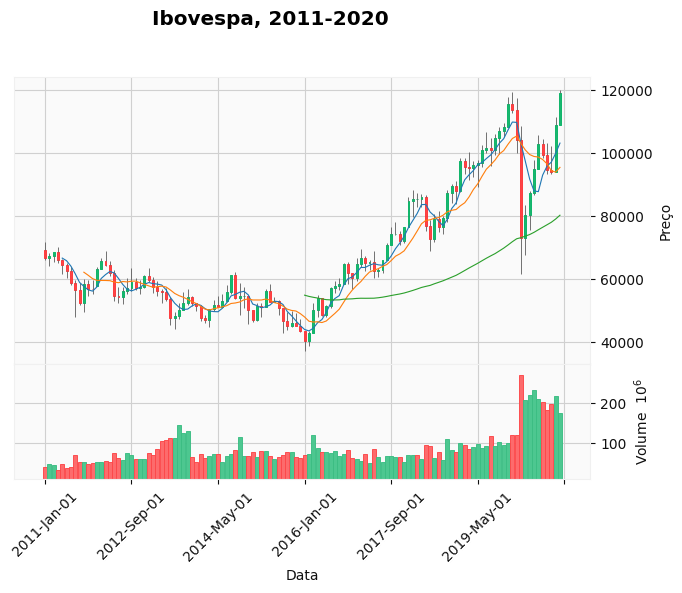

In [26]:
mpf.plot(Ibov11_20, style='yahoo', type = 'candle', mav=(5,10,61), volume = True, title = 'Ibovespa, 2011-2020',xlabel='Data',ylabel = 'Preço')
#mpf.savefig('IBOV 2011 2020.png')

Salvando dados para arquivo CSV de backup/visualização

In [149]:
Ibov11_20.to_csv(r"C:\Users\Nathan\Desktop\Trabalho AED\Ibov11_20.csv")

Caracterizando Dados de Fechamento do IBOV 

In [151]:
Ibov11_20['Close'].describe()

count       120.000000
mean      68012.808333
std       19447.099407
min       40406.000000
25%       53421.500000
50%       61554.000000
75%       79633.000000
max      119306.000000
Name: Close, dtype: float64

PLotando Box-plot para os valores mensais de fechamento do IBOV.

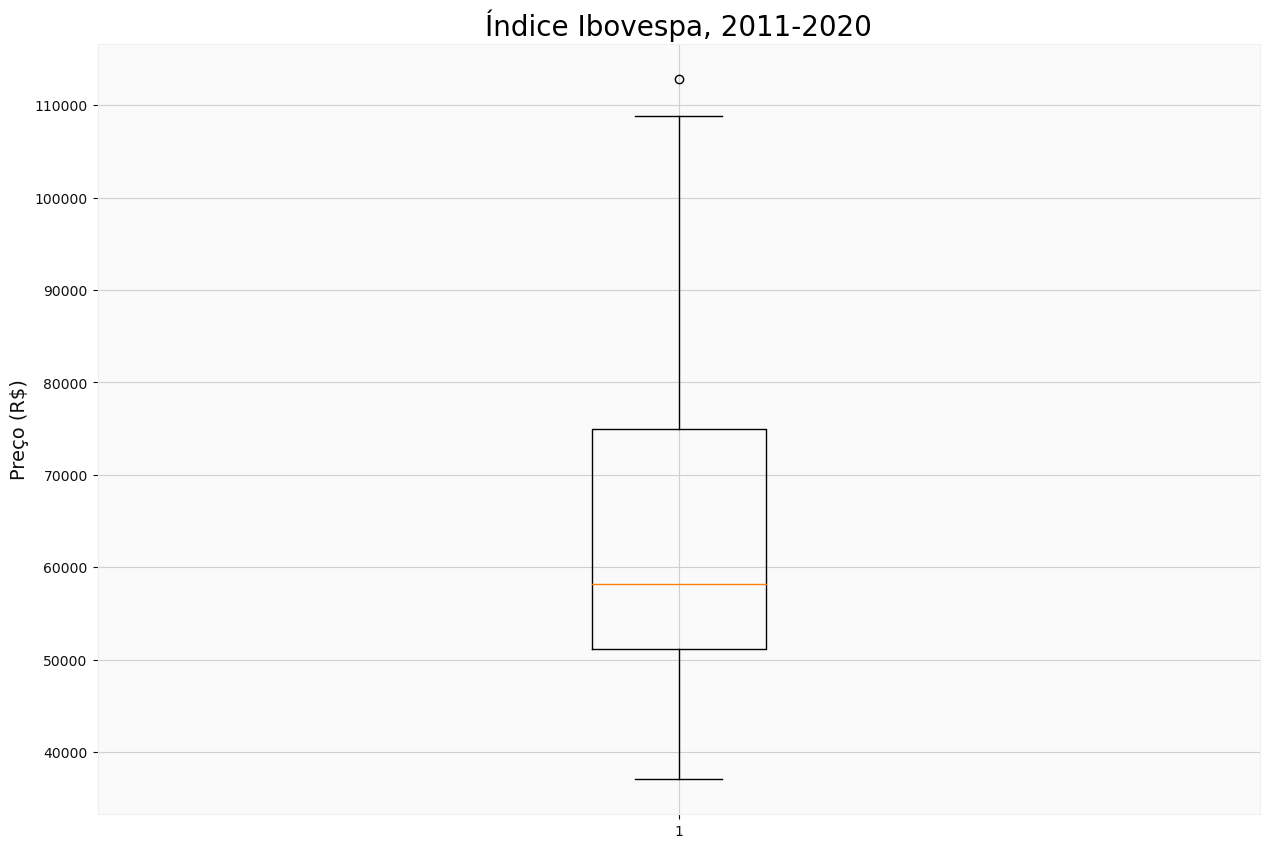

In [297]:
plt.figure(figsize=(15,10))
plt.boxplot(Ibov11_20_L['Close'])
plt.title('Índice Ibovespa, 2011-2020',fontsize=20)
plt.ylabel('Preço (R$)',fontsize=14)
#plt.xlabel('Boxplot IBOV')
plt.savefig('IBOV boxplot.png')

# Taxa SELIC 

In [24]:
from bcb import sgs

Obtendo dados mensais da SELIC na década 2011-2020 

In [42]:
selic2011_2020 = sgs.get(('selic',432),start='2011-01-01',end='2020-12-01', freq = 'm')

In [170]:
selic2011_2020

,selic
Date,
2011-01,10.75
2011-01,10.75
2011-01,10.75
2011-01,10.75
2011-01,10.75
...,...
2020-11,2.00
2020-11,2.00
2020-11,2.00


In [171]:
selic2011_2020.to_csv(r"C:\Users\Nathan\Desktop\Trabalho AED\selic2011_2020.csv")

In [143]:
sgs.get(('selic',432),start='2011-01-01',end='2020-12-01', freq = 't').tail()

,selic
Date,
2020-11-27 00:00,2.0
2020-11-28 00:00,2.0
2020-11-29 00:00,2.0
2020-11-30 00:00,2.0
2020-12-01 00:00,2.0


In [140]:
selic2011_2020.describe()

,selic
count,3623.00000
mean,9.35454
std,3.42240
min,2.00000
25%,6.50000
50%,9.50000
75%,12.00000
max,14.25000


Text(0.5, 1.0, 'Taxa Selic, 2011-2020')

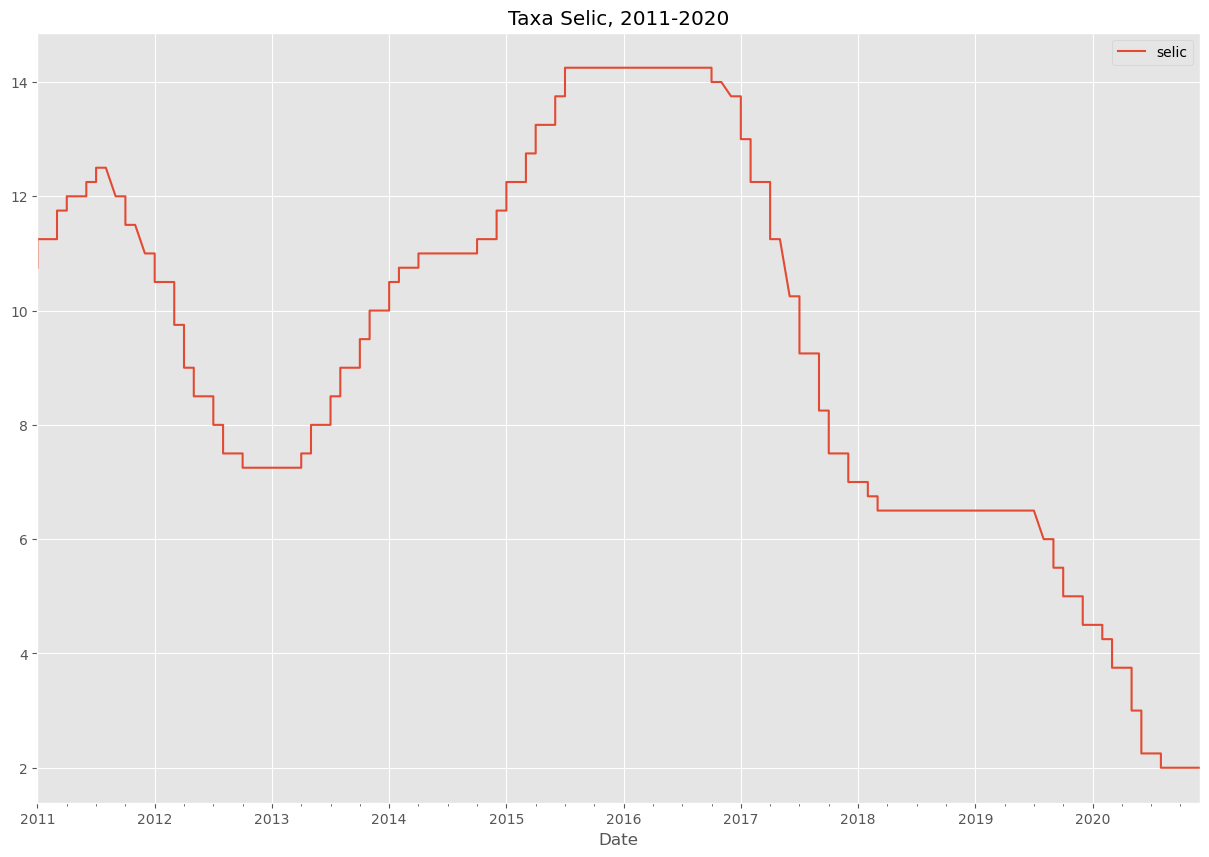

In [44]:
plt.style.use('ggplot')
selic2011_2020.plot(figsize=(15,10))
plt.title('Taxa Selic, 2011-2020')

In [189]:
selic2011_2020_L = pd.read_excel(r"C:\Users\Nathan\Desktop\Trabalho AED\selic2011_2020_L.xlsx")
selic2011_2020_L

,Date,selic
0,2011-01,10.75
1,2011-02,11.25
2,2011-03,11.25
3,2011-04,11.75
4,2011-05,12.00
...,...,...
115,2020-08,2.25
116,2020-09,2.00
117,2020-10,2.00
118,2020-11,2.00


In [190]:
selic2011_2020_L['Date'] = selic2011_2020_L['Date'].astype(str) + '-01'

In [191]:
selic2011_2020_L

,Date,selic
0,2011-01-01,10.75
1,2011-02-01,11.25
2,2011-03-01,11.25
3,2011-04-01,11.75
4,2011-05-01,12.00
...,...,...
115,2020-08-01,2.25
116,2020-09-01,2.00
117,2020-10-01,2.00
118,2020-11-01,2.00


In [195]:
selic2011_2020_L['Date'] = pd.to_datetime(selic2011_2020_L['Date'])

In [196]:
selic2011_2020_L

,Date,selic
0,2011-01-01,10.75
1,2011-02-01,11.25
2,2011-03-01,11.25
3,2011-04-01,11.75
4,2011-05-01,12.00
...,...,...
115,2020-08-01,2.25
116,2020-09-01,2.00
117,2020-10-01,2.00
118,2020-11-01,2.00


In [184]:
selic2011_2020_L.describe()

,selic
count,120.000000
mean,9.316667
std,3.443227
min,2.000000
25%,6.500000
50%,9.625000
75%,12.000000
max,14.250000


In [49]:
IPCA2011_2020 = sgs.get(('IPCA',433), start = '2011-01-01', end = '2020-01-01', freq = 'm')
IPCA2011_2020.head(15)

,IPCA
Date,
2011-01,0.83
2011-02,0.80
2011-03,0.79
2011-04,0.77
2011-05,0.47
2011-06,0.15
2011-07,0.16
2011-08,0.37
2011-09,0.53


In [56]:
!pip install sidrapy

In [57]:
import sidrapy
import seaborn as sns
import datetime as dt

In [58]:
# Importa as variações do IPCA
ipca_raw = sidrapy.get_table(table_code = '1737',
                             territorial_level = '1',
                             ibge_territorial_code = 'all',
                             variable = '63,69,2263,2264,2265',
                             period = 'last%20472')

In [59]:
# Realiza a limpeza e manipulação da tabela
ipca =  (
    ipca_raw
    .loc[1:,['V', 'D2C', 'D3N']]
    .rename(columns = {'V': 'value',
                       'D2C': 'date',
                       'D3N': 'variable'}
            )
    .assign(variable = lambda x: x['variable'].replace({'IPCA - Variação mensal' : 'Var. mensal (%)',
                                                        'IPCA - Variação acumulada no ano': 'Var. acumulada no ano (%)', 
                                                        'IPCA - Variação acumulada em 3 meses' : 'Var. MM3M (%)',
                                                        'IPCA - Variação acumulada em 6 meses': 'Var. MM6M (%)',
                                                        'IPCA - Variação acumulada em 12 meses' : 'Var. MM12M (%)'}),
            date  = lambda x: pd.to_datetime(x['date'],
                                              format = "%Y%m"),
            value = lambda x: x['value'].astype(float)
           )
    .pipe(lambda x: x.loc[x.date > '2007-01-01']
          )
        )

In [60]:
# Configura o tema do gráfico
## Cores
colors = ['#282f6b', '#b22200', '#eace3f', '#224f20', '#b35c1e', '#419391', '#839c56','#3b89bc']

## Tamanho
theme = {'figure.figsize' : (15, 10)}

## Aplica o tema
sns.set_theme(rc = theme,
              palette = colors)

Text(1.0, -0.08, 'Fonte: analisemacro.com.br com dados do Sidra/IBGE')

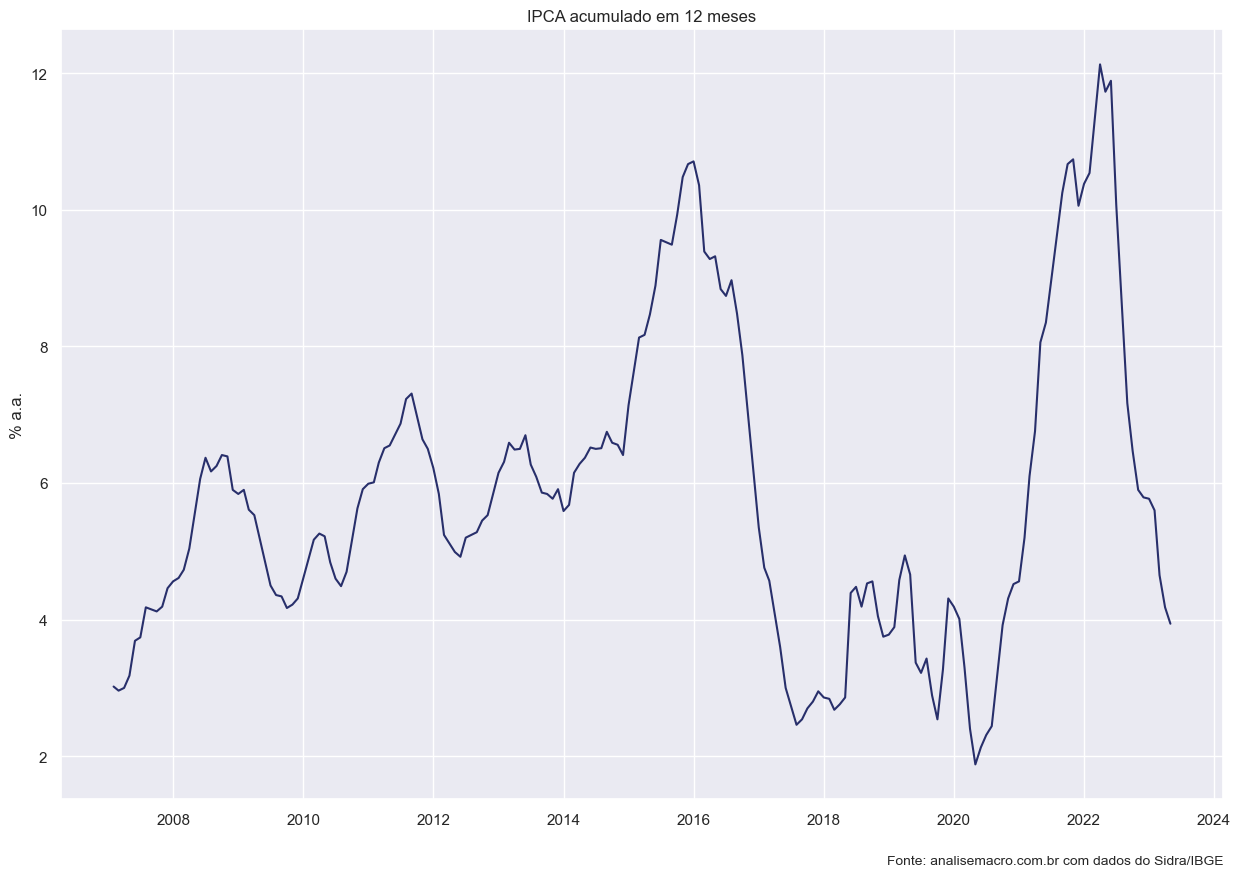

In [61]:
# Filtra somente para o IPCA acumulado em 12 meses
ipca_12m = (   
            ipca
            .pipe(lambda x: x.loc[x.variable == 'Var. MM12M (%)'])
           )

# Plota o IPCA acumulado em 12 meses
sns.lineplot(x = 'date',
             y = 'value',
             data = ipca_12m).set(title = 'IPCA acumulado em 12 meses',
                                                           xlabel = '',
                                                           ylabel = '% a.a.')

# Adiciona a fonte no gráfico           
plt.annotate('Fonte: analisemacro.com.br com dados do Sidra/IBGE',
            xy = (1.0, -0.08),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

In [110]:
ipca_12m_2011_2020 = ipca_12m[47:167]
ipca_12m_2011_2020

,value,date,variable
1620,5.99,2011-01-01,Var. MM12M (%)
1625,6.01,2011-02-01,Var. MM12M (%)
1630,6.30,2011-03-01,Var. MM12M (%)
1635,6.51,2011-04-01,Var. MM12M (%)
1640,6.55,2011-05-01,Var. MM12M (%)
...,...,...,...
2195,2.44,2020-08-01,Var. MM12M (%)
2200,3.14,2020-09-01,Var. MM12M (%)
2205,3.92,2020-10-01,Var. MM12M (%)
2210,4.31,2020-11-01,Var. MM12M (%)


Text(0, 0.5, 'Acumulado 12 Meses (%)')

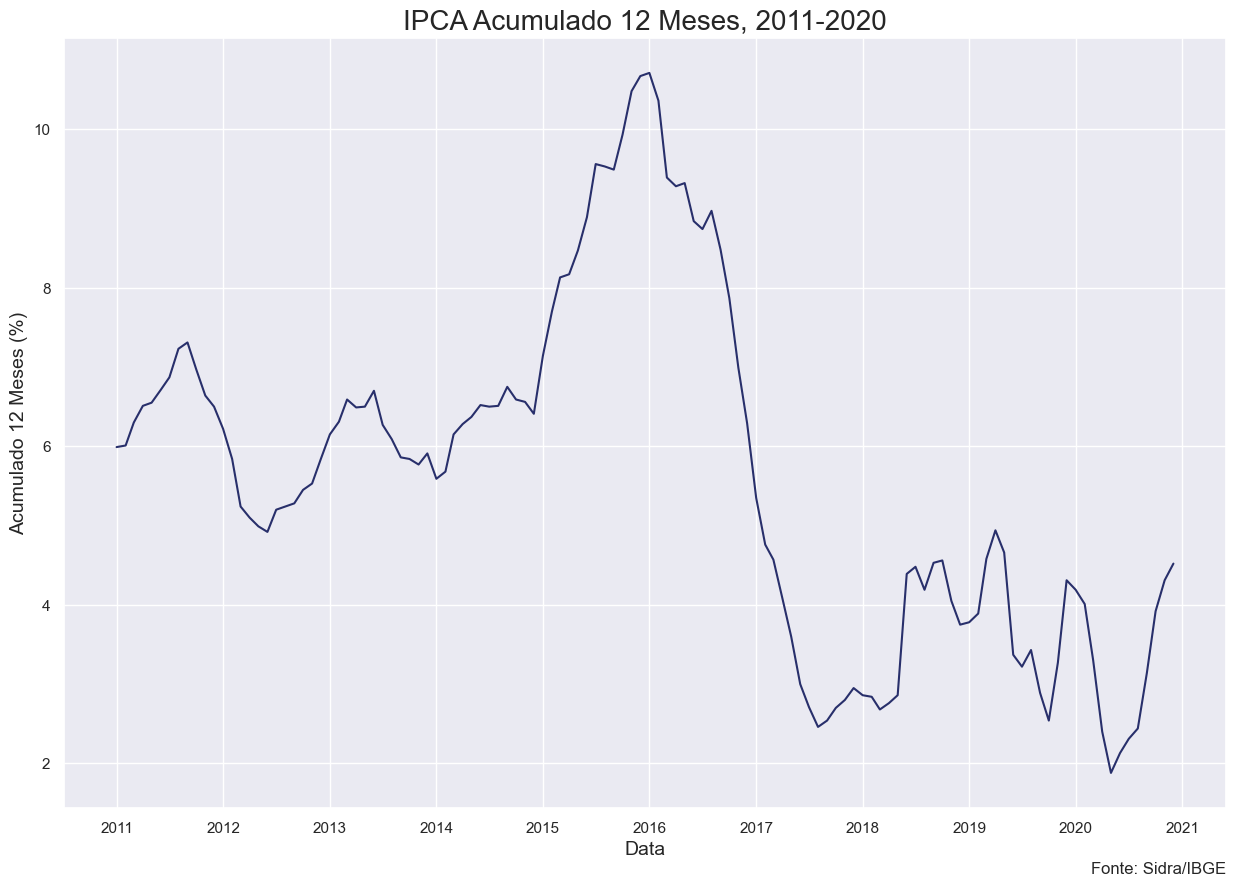

In [124]:
# Plota o IPCA acumulado em 12 meses
sns.lineplot(x = 'date',
             y = 'value',
             data = ipca_12m_2011_2020)

# Adiciona a fonte no gráfico           
plt.annotate('Fonte: Sidra/IBGE',
            xy = (1.0, -0.08),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=12)

plt.title('IPCA Acumulado 12 Meses, 2011-2020', fontsize = 20)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Acumulado 12 Meses (%)', fontsize = 14)
plt.legend('Índice de preços IPCA 12 meses durante a década 2011-2020.')

#plt.savefig('IPCA 12 meses.png')

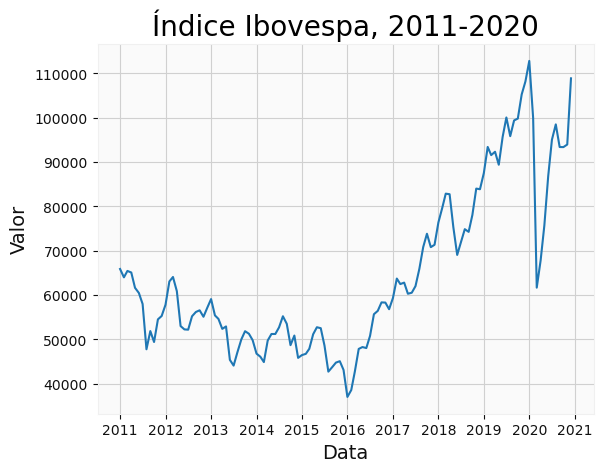

In [207]:
sns.lineplot(x = 'Date',y = 'Close', data = Ibov11_20_L)
plt.title('Índice Ibovespa, 2011-2020', fontsize = 20)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Valor', fontsize = 14)
plt.savefig('IBOV 2011 2020.png')

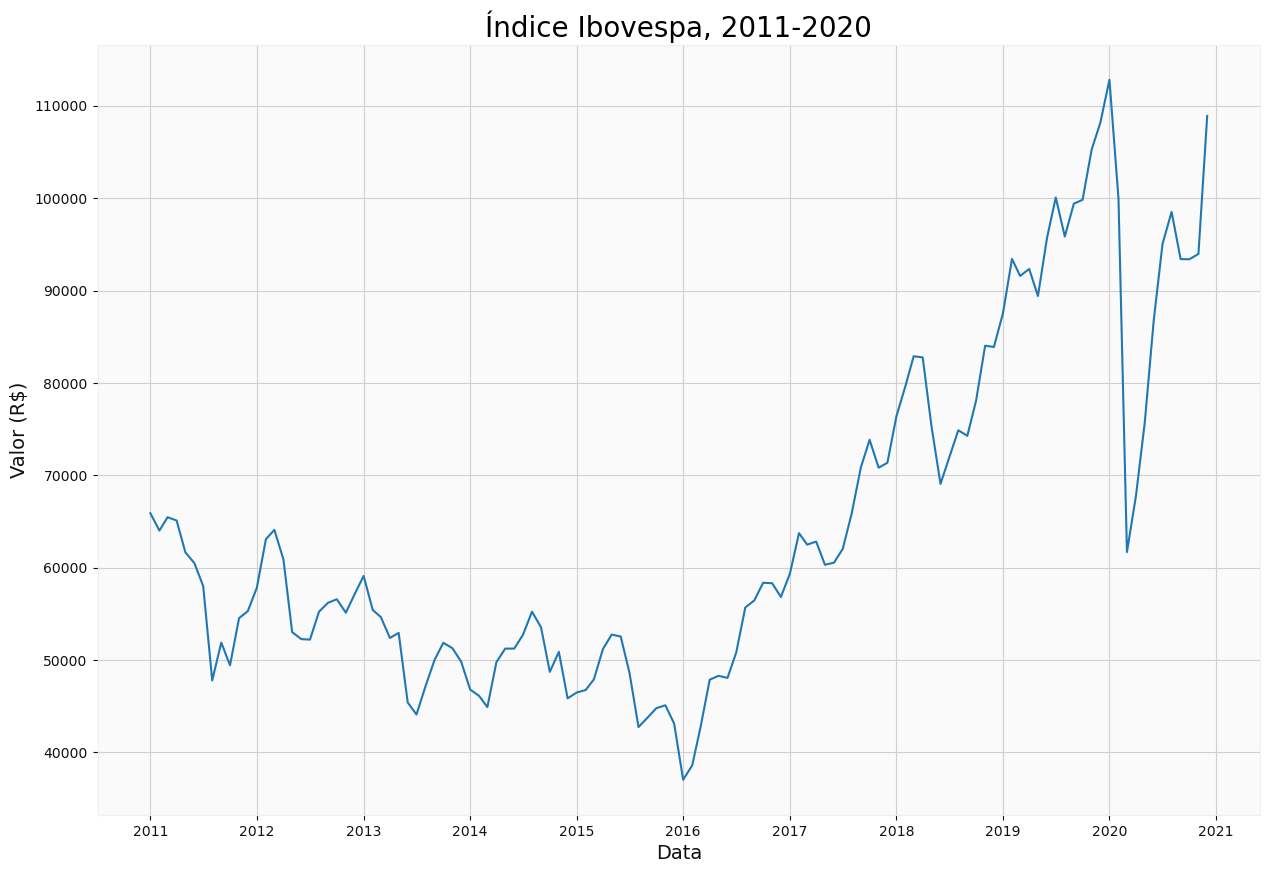

In [289]:
#sns.lineplot(x = 'Date',y = 'Close', data = Ibov11_20_L)
plt.figure(figsize=(15,10))
plt.plot(Ibov11_20_L['Date'],Ibov11_20_L['Close'],label='IBOV')
plt.title('Índice Ibovespa, 2011-2020', fontsize = 20)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Valor (R$)', fontsize = 14)
plt.savefig('IBOV 2011 2020.png')

In [162]:
Ibov11_20_L

,Date,High,Low,Close,Volume,Dividends,Stock
0,2011-01-01,69310.0,71924.0,65898.0,66575.0,41876200,0.0
1,2011-02-01,66575.0,68226.0,64016.0,67383.0,48663800,0.0
2,2011-03-01,67381.0,68606.0,65463.0,68587.0,45965400,0.0
3,2011-04-01,68588.0,70108.0,65105.0,66133.0,34800400,0.0
4,2011-05-01,66119.0,66500.0,61659.0,64620.0,48359800,0.0
...,...,...,...,...,...,...,...
115,2020-08-01,102913.0,104523.0,98513.0,99369.0,202682200,0.0
116,2020-09-01,99382.0,103226.0,93408.0,94603.0,182459100,0.0
117,2020-10-01,94604.0,102218.0,93387.0,93952.0,198128300,0.0
118,2020-11-01,93968.0,111603.0,93968.0,108888.0,217759400,0.0


In [130]:
ipca_12m_2011_2020['value'].describe()

count    120.000000
mean       5.642750
std        2.179523
min        1.880000
25%        3.987500
50%        5.805000
75%        6.655000
max       10.710000
Name: value, dtype: float64

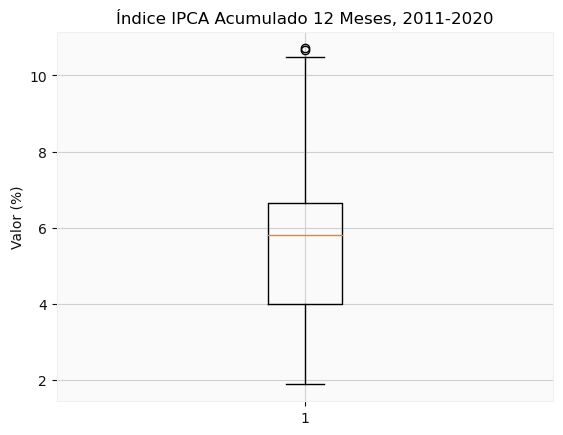

In [365]:
plt.boxplot(ipca_12m_2011_2020['value'])
plt.title('Índice IPCA Acumulado 12 Meses, 2011-2020')
plt.ylabel('Valor (%)')
plt.savefig('Boxplot IPCA.png')

In [225]:
selic2011_2020_L

,Date,selic
0,2011-01-01,10.75
1,2011-02-01,11.25
2,2011-03-01,11.25
3,2011-04-01,11.75
4,2011-05-01,12.00
...,...,...
115,2020-08-01,2.25
116,2020-09-01,2.00
117,2020-10-01,2.00
118,2020-11-01,2.00


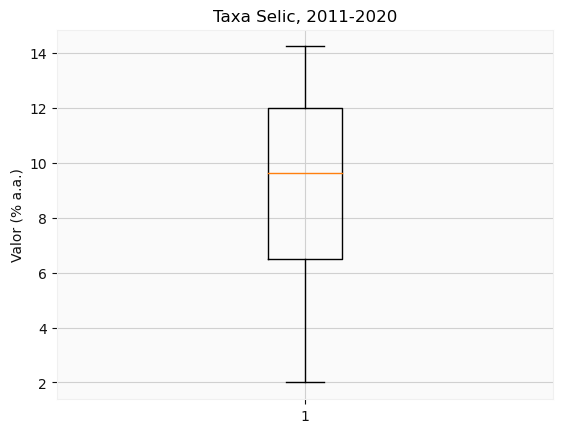

In [372]:
plt.boxplot(selic2011_2020_L['selic'])
plt.title('Taxa Selic, 2011-2020')
plt.ylabel('Valor (% a.a.)')
plt.savefig('Boxplot Selic.png')

Relação Entre Variáveis

In [208]:
#comando para calcular correlação linear 
from scipy.stats import pearsonr

In [209]:
pearsonr(Ibov11_20_L['Close'],ipca_12m_2011_2020['value'])

(-0.7259282147061431, 6.5967578693883385e-21)

In [210]:
pearsonr(Ibov11_20_L['Close'],selic2011_2020_L['selic'])

(-0.767298389572066, 1.6220666532806932e-24)

In [211]:
pearsonr(ipca_12m_2011_2020['value'],selic2011_2020_L['selic'])

(0.7951045514161221, 2.1591115319947194e-27)

Cálculo de Juros Reais Taxa Selic - IPCA acumulado


In [237]:
ipcaN = ipca_12m_2011_2020.reset_index()
ipcaN

,index,value,date,variable
0,1620,5.99,2011-01-01,Var. MM12M (%)
1,1625,6.01,2011-02-01,Var. MM12M (%)
2,1630,6.30,2011-03-01,Var. MM12M (%)
3,1635,6.51,2011-04-01,Var. MM12M (%)
4,1640,6.55,2011-05-01,Var. MM12M (%)
...,...,...,...,...
115,2195,2.44,2020-08-01,Var. MM12M (%)
116,2200,3.14,2020-09-01,Var. MM12M (%)
117,2205,3.92,2020-10-01,Var. MM12M (%)
118,2210,4.31,2020-11-01,Var. MM12M (%)


In [251]:
selic2011_2020_L

,Date,selic,juro real
0,2011-01-01,10.75,4.76
1,2011-02-01,11.25,5.24
2,2011-03-01,11.25,4.95
3,2011-04-01,11.75,5.24
4,2011-05-01,12.00,5.45
...,...,...,...
115,2020-08-01,2.25,-0.19
116,2020-09-01,2.00,-1.14
117,2020-10-01,2.00,-1.92
118,2020-11-01,2.00,-2.31


In [250]:
selic2011_2020_L['juro real'] = selic2011_2020_L['selic']-ipcaN['value']

Text(0, 0.5, 'Valor (%)')

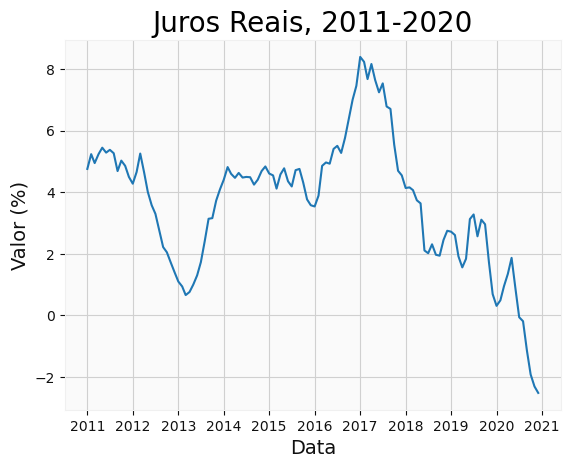

In [257]:
sns.lineplot(x = 'Date',y = 'juro real', data = selic2011_2020_L)
plt.title('Juros Reais, 2011-2020', fontsize = 20)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Valor (%)', fontsize = 14)

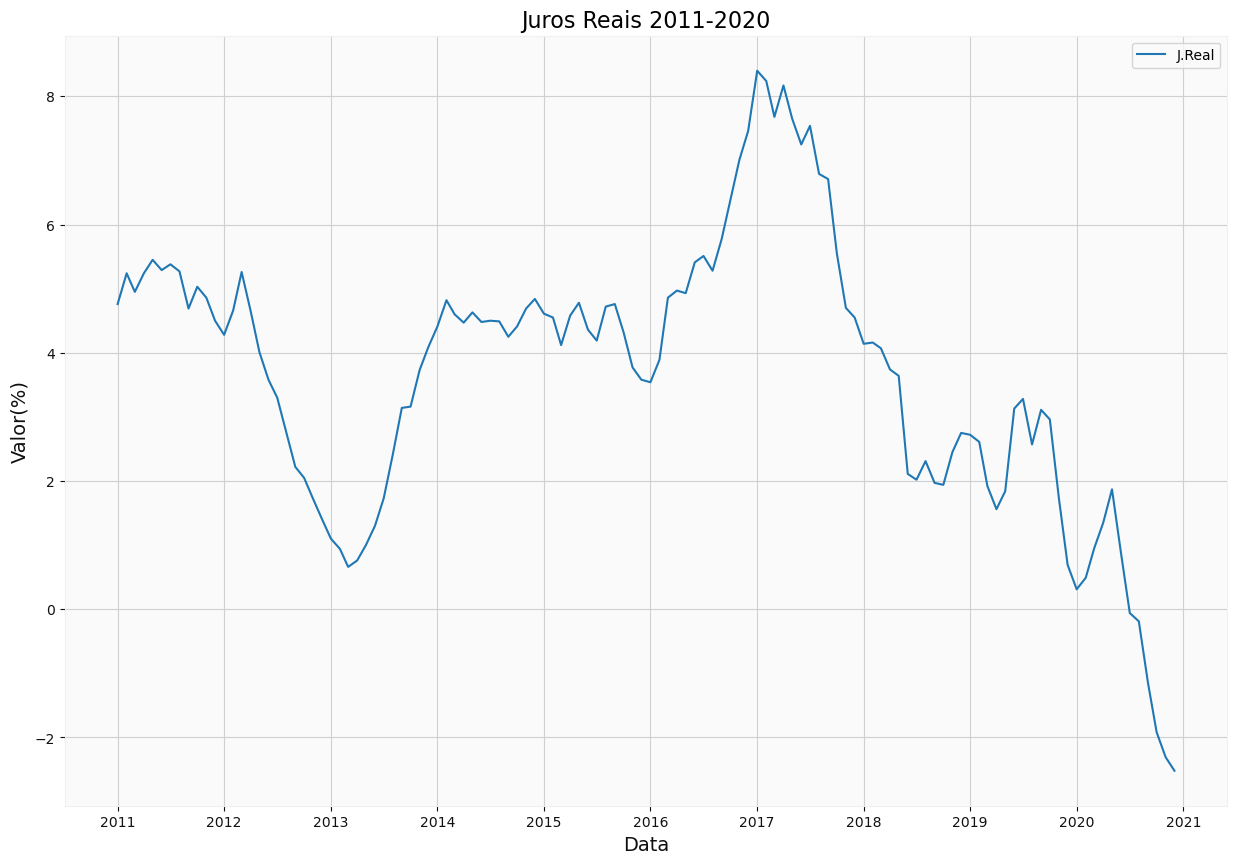

In [376]:
plt.figure(figsize=(15,10))
plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['juro real'], label='J.Real')
#plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['juro real'],label = 'Juros Reais')
plt.title('Juros Reais 2011-2020',fontsize = 16)
plt.xlabel('Data',fontsize = 14)
plt.ylabel('Valor(%)',fontsize = 14)
plt.legend()
plt.savefig('Juros reais.png')

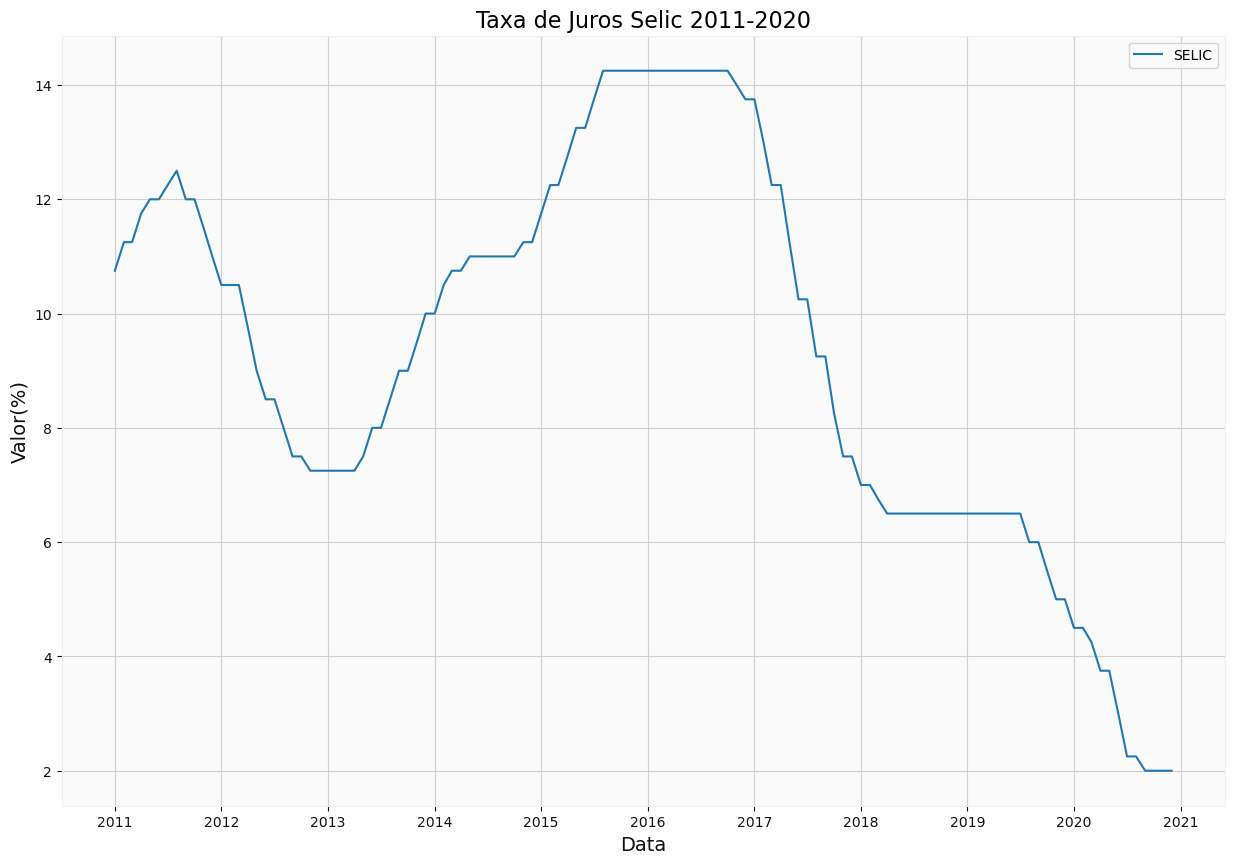

In [375]:
plt.figure(figsize=(15,10))
plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['selic'], label='SELIC')
#plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['juro real'],label = 'Juros Reais')
plt.title('Taxa de Juros Selic 2011-2020',fontsize = 16)
plt.xlabel('Data',fontsize = 14)
plt.ylabel('Valor(%)',fontsize = 14)
plt.legend()
plt.savefig('Selic 2011-2020 N.png')

In [254]:
selic2011_2020_L['juro real'].describe()

count    120.000000
mean       3.673917
std        2.161541
min       -2.520000
25%        2.095000
50%        4.150000
75%        4.845000
max        8.400000
Name: juro real, dtype: float64

In [373]:
selic2011_2020_L['selic'].describe()

count    120.000000
mean       9.316667
std        3.443227
min        2.000000
25%        6.500000
50%        9.625000
75%       12.000000
max       14.250000
Name: selic, dtype: float64

In [255]:
pearsonr(Ibov11_20_L['Close'],selic2011_2020_L['juro real'])

(-0.49030057024603024, 1.3138106508482382e-08)

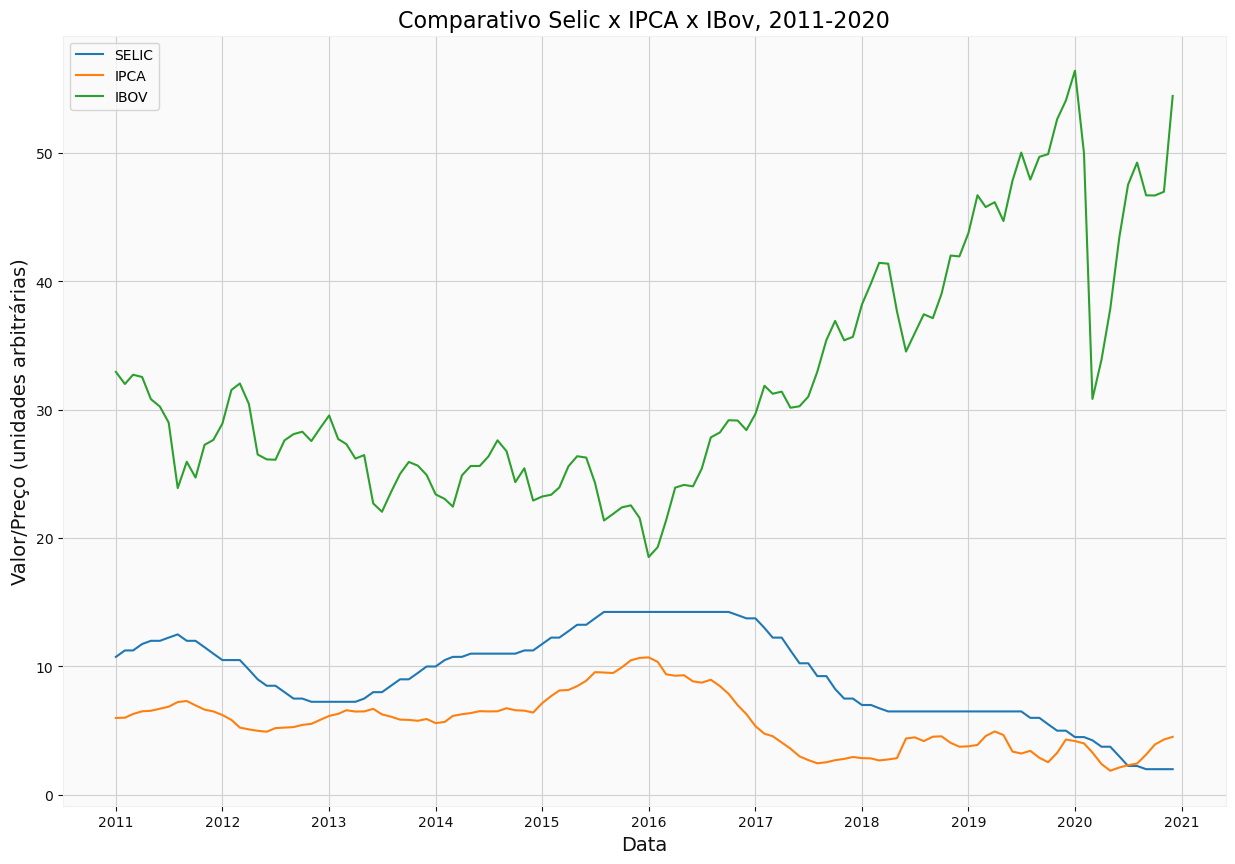

In [285]:
plt.figure(figsize=(15,10))
plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['selic'], label='SELIC')
#plt.plot(selic2011_2020_L['Date'],selic2011_2020_L['juro real'],label = 'Juros Reais')
plt.plot(ipcaN['date'],ipcaN['value'], label = 'IPCA')
plt.plot(Ibov11_20_L['Date'], Ibov11_20_L['Close']/2000, label = 'IBOV')
plt.title('Comparativo Selic x IPCA x IBov, 2011-2020', fontsize = 16)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Valor/Preço (unidades arbitrárias)', fontsize = 14)
plt.legend()
plt.savefig('Comparativo.png')

In [305]:
from statsmodels.tsa.seasonal import seasonal_decompose

mult_dec = seasonal_decompose(Ibov11_20['Close'], model = 'multiplicative', extrapolate_trend='freq')

aditive_dec= seasonal_decompose(Ibov11_20['Close'], model = 'additive', extrapolate_trend='freq')

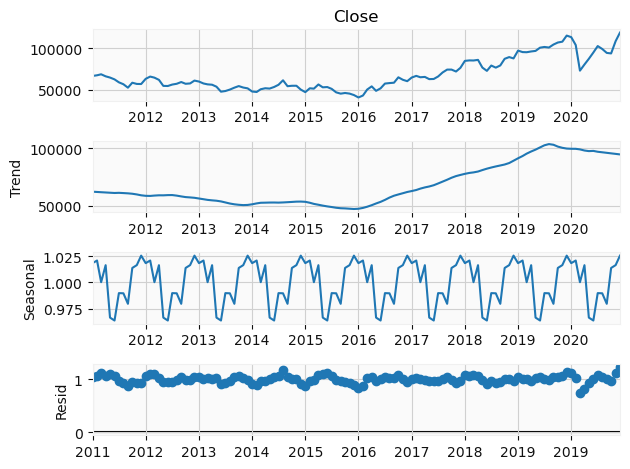

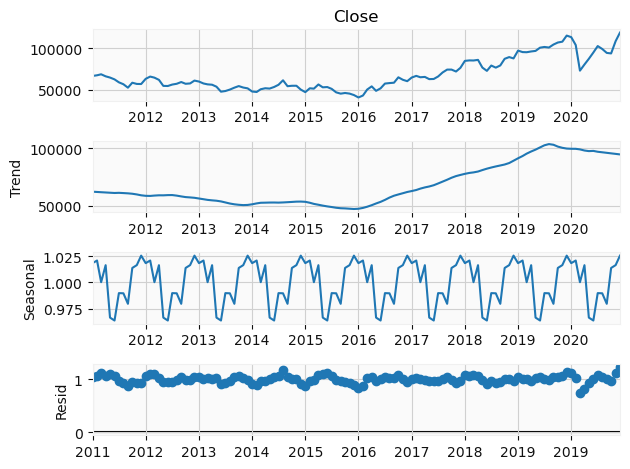

In [306]:
mult_dec.plot()

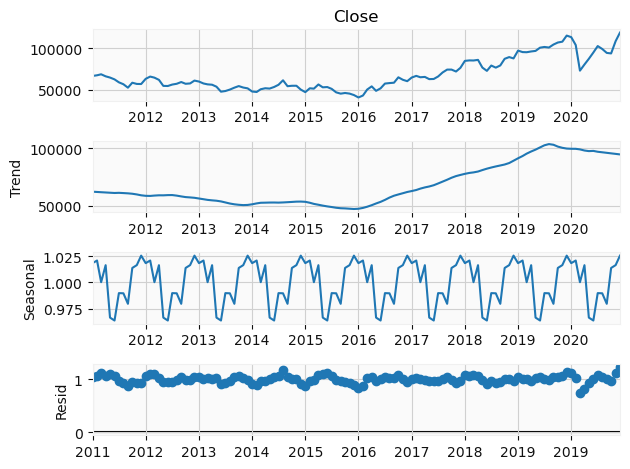

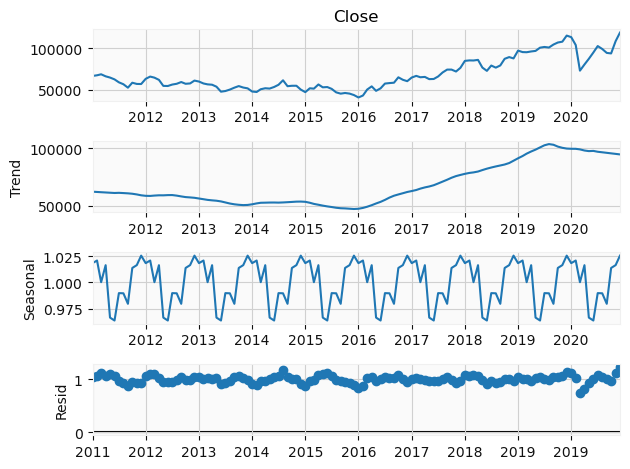

In [307]:
mult_dec.plot()

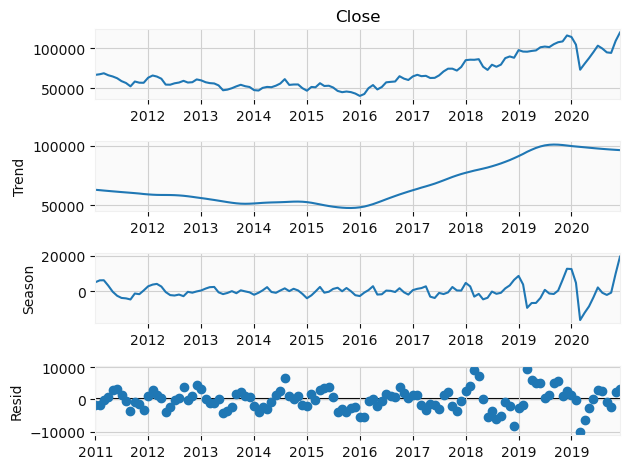

In [338]:
from statsmodels.tsa.seasonal import STL

stl = STL(Ibov11_20['Close']).fit()

stl_plot = stl.plot()

<AxesSubplot:xlabel='Date'>

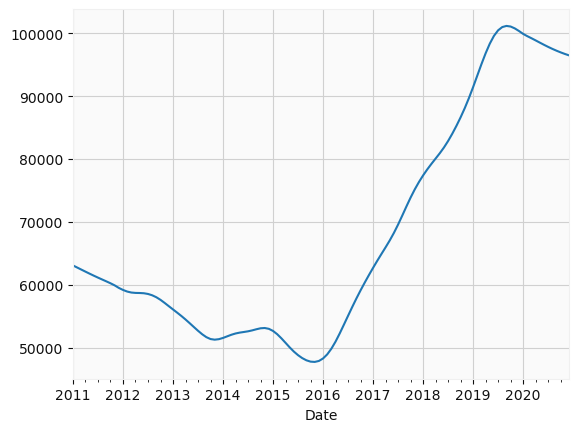

In [342]:
stl.trend.plot()

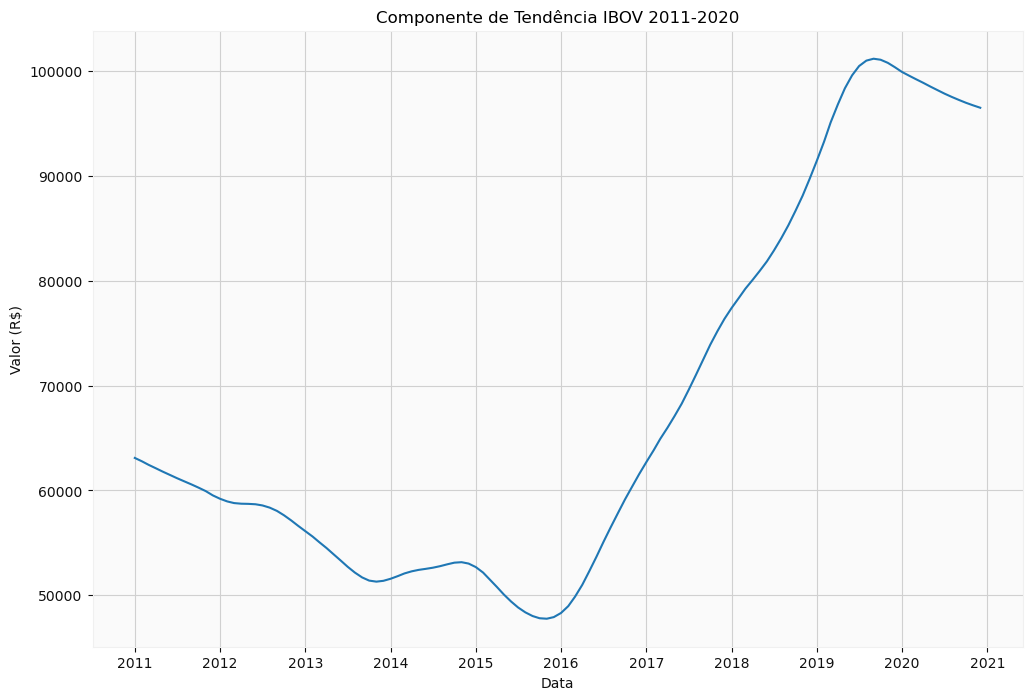

In [352]:
plt.figure(figsize=(12,8))
plt.plot(stl.trend)
plt.title('Componente de Tendência IBOV 2011-2020')
plt.ylabel('Valor (R$)')
plt.xlabel('Data')
plt.savefig('Componente de Tendência IBOV.png')

In [310]:
import math

In [358]:
Ibov11_20['Close'].describe()

count       120.000000
mean      68012.808333
std       19447.099407
min       40406.000000
25%       53421.500000
50%       61554.000000
75%       79633.000000
max      119306.000000
Name: Close, dtype: float64

In [326]:
R=Ibov11_20['Close'].pct_change().dropna()

In [327]:
R

Date
2011-02-01 00:00:00-02:00    0.012137
2011-03-01 00:00:00-03:00    0.017868
2011-04-01 00:00:00-03:00   -0.035779
2011-05-01 00:00:00-03:00   -0.022878
2011-06-01 00:00:00-03:00   -0.034293
                               ...   
2020-08-01 00:00:00-03:00   -0.034427
2020-09-01 00:00:00-03:00   -0.047963
2020-10-01 00:00:00-03:00   -0.006881
2020-11-01 00:00:00-03:00    0.158975
2020-12-01 00:00:00-03:00    0.095676
Name: Close, Length: 119, dtype: float64

<AxesSubplot:xlabel='Date'>

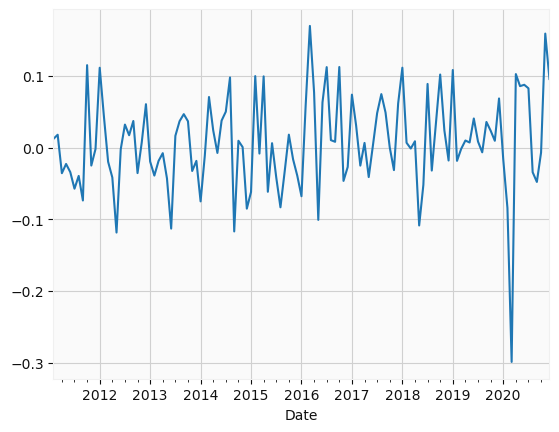

In [333]:
R.plot()

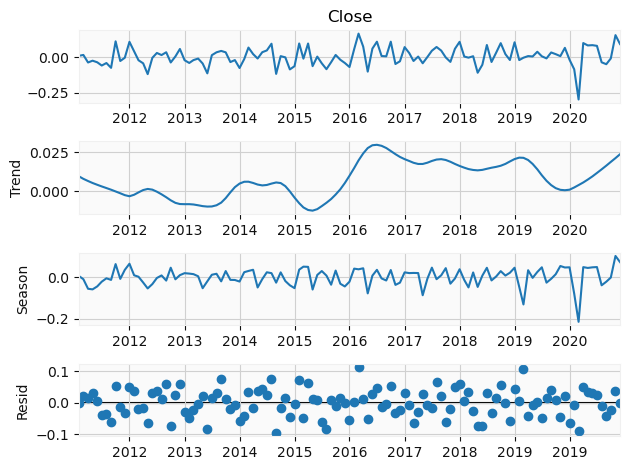

In [334]:
stlR = STL(R).fit()

stlR_plot = stl.plot()

In [335]:
R.describe()

count    119.000000
mean       0.007143
std        0.065983
min       -0.299044
25%       -0.033152
50%        0.006448
75%        0.047303
max        0.169673
Name: Close, dtype: float64

In [336]:
R_p = R*100

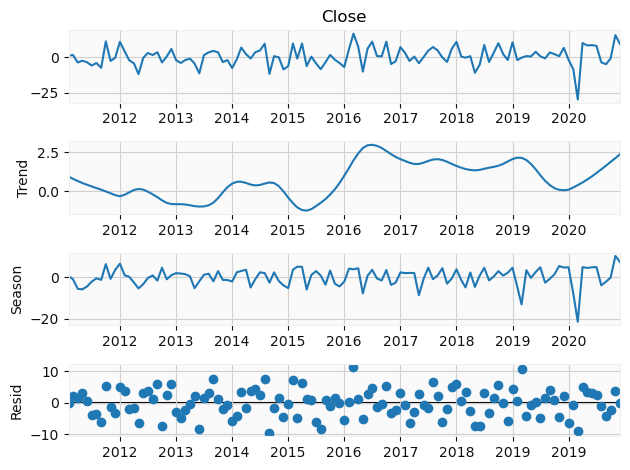

In [354]:
stlRp = STL(R_p).fit()

stlRp_plot = stlRp.plot()

In [355]:
R_p.describe()

count    119.000000
mean       0.714276
std        6.598282
min      -29.904389
25%       -3.315235
50%        0.644774
75%        4.730263
max       16.967332
Name: Close, dtype: float64

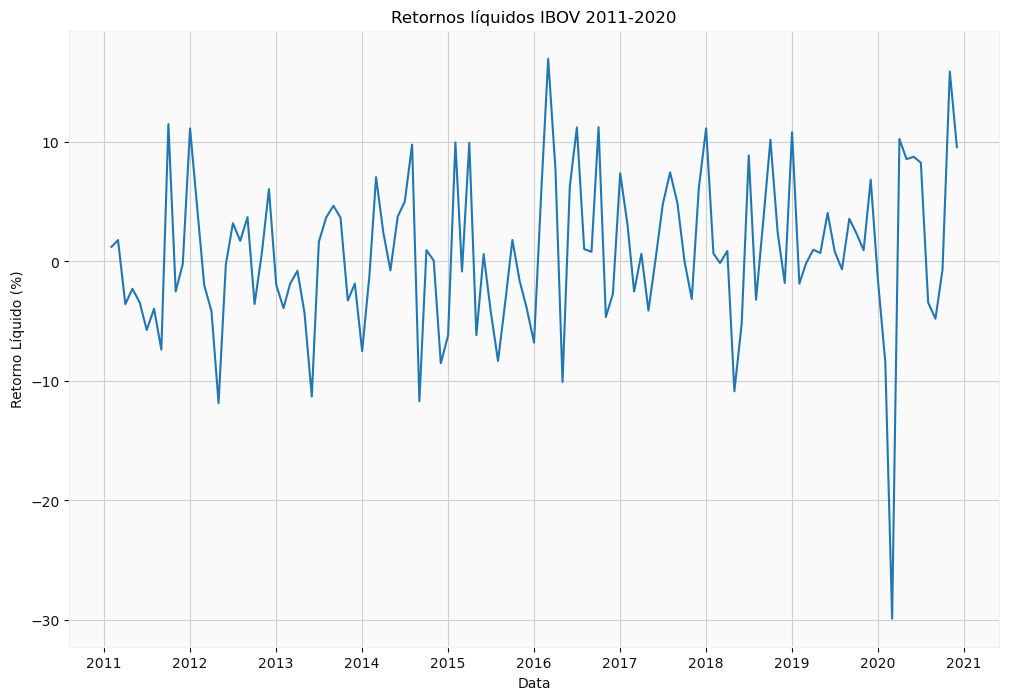

In [356]:
plt.figure(figsize=(12,8))
plt.plot(R_p)
plt.title('Retornos líquidos IBOV 2011-2020')
plt.ylabel('Retorno Líquido (%)')
plt.xlabel('Data')
plt.savefig('Retornos.png')

In [359]:
R_p.describe()

count    119.000000
mean       0.714276
std        6.598282
min      -29.904389
25%       -3.315235
50%        0.644774
75%        4.730263
max       16.967332
Name: Close, dtype: float64

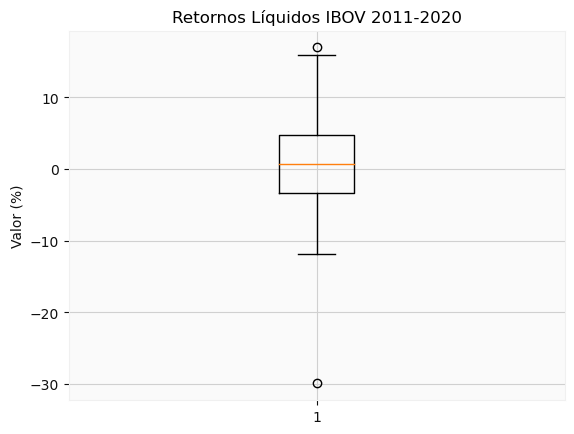

In [364]:
plt.boxplot(R_p)
plt.title('Retornos Líquidos IBOV 2011-2020')
plt.ylabel('Valor (%)')
plt.savefig('Boxplot Retornos Líquidos.png')